# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN32"
COLLABORATORS = "Hałys Filip, Staroń Bartosz, Batko Franciszek"

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def g_function_poisson(d, intensity):
    zakres=len(d)
    GD=np.array([])
    for i in range(zakres):
        gd=1-np.exp(-intensity*np.pi*(d[i]**2))
        GD=np.append(GD, gd)
    XY={"D":d, "G":GD}
    g=pd.DataFrame(data=XY)
    return(g)

def f_function_poisson(d, intensity):
    zakres=len(d)
    FD=np.array([])
    for i in range(zakres):
        fd=1-np.exp(-intensity*np.pi*(d[i]**2))
        FD=np.append(FD, fd)
    XY={"D":d, "F":FD}
    g=pd.DataFrame(data=XY)
    return(g)
#raise NotImplementedError()

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu wygodniejszym sposobem zdobywania informacji na temat wykorzystywanych modułów, klas i funkcji jest wykorzystanie funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Zadanie 1: Import i przygotowanie danych (5 pkt)
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian). Następnie, wykorzystując funkcję `geopandas.GeoDataFrame.dissolve()` przygotuj tablicę zawierającą geometrię granic całego kraju. Dostosuj informację znajdującą się w kolumnie "Nazwa" stworzonej tablicy do informacji w niej zawartej.

In [5]:
# YOUR CODE HERE
punkty1 = gpd.read_file('points_1.zip')
punkty2 = gpd.read_file('points_2.zip')
punkty3 = gpd.read_file('points_3.zip')
punkty4 = gpd.read_file('points_4.zip')
punkty5 = gpd.read_file('points_5.zip')
powiaty = gpd.read_file('Powiaty.zip')

polska = powiaty.dissolve()

polska['Nazwa'] = polska['Nazwa'].replace(['powiat ropczycko-sędziszowski'], 'Polska')
polska
#raise NotImplementedError()

,geometry,Nazwa
0,"POLYGON ((314574.250 311049.909, 314544.080 31...",Polska


### Zadanie 2: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów z plików points_1.zip i points_2.zip na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

Przydatne klasy, funkcje i własności:
- `geopandas.GeoSeries.within()`
- `geopandas.GeoSeries.area`

#### a) Przygotowanie funkcji

In [6]:
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    iteracja = len(subregions)
    lista = []
    for i in range(iteracja):
        true_or_false = points.within(subregions.iat[i,1])
        suma_prawd = sum(true_or_false)
        lista.append(suma_prawd)
    return lista

    #raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    intensity: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    intensity = point_count_on_subregions(points, subregions) / subregions.area
    return intensity
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
powiaty = gpd.read_file('Powiaty.zip')

powiaty['Intensywność punktów 1'] = intensity_on_subregions(punkty1['geometry'], powiaty)
powiaty['Intensywność punktów 2'] = intensity_on_subregions(punkty2['geometry'], powiaty)

#raise NotImplementedError()

,Nazwa,geometry,Intensywność punktów 1,Intensywność punktów 2
0,powiat ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26...",1.824740e-09,0.000000e+00
1,powiat łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49...",0.000000e+00,0.000000e+00
2,powiat piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47...",1.611810e-09,9.670861e-09
3,powiat radomski,"POLYGON ((638056.482 404421.246, 638059.412 40...",6.542425e-09,6.542425e-10
4,powiat sierpecki,"POLYGON ((534236.749 555932.727, 534235.027 55...",4.700975e-09,3.525731e-09
...,...,...,...,...
375,powiat nowodworski,"POLYGON ((521445.985 722541.335, 521523.278 72...",2.971687e-09,0.000000e+00
376,powiat jaworski,"POLYGON ((303544.254 353195.337, 303547.016 35...",5.164896e-09,3.443264e-09
377,powiat węgrowski,"POLYGON ((702854.223 532567.782, 702853.911 53...",6.560269e-09,8.200337e-10
378,powiat wejherowski,"POLYGON ((430377.866 773965.783, 430351.853 77...",5.443972e-09,0.000000e+00


#### c) Wizualizacja

<AxesSubplot: title={'center': 'Intensywność punktów 2 na mapie powiatów'}>

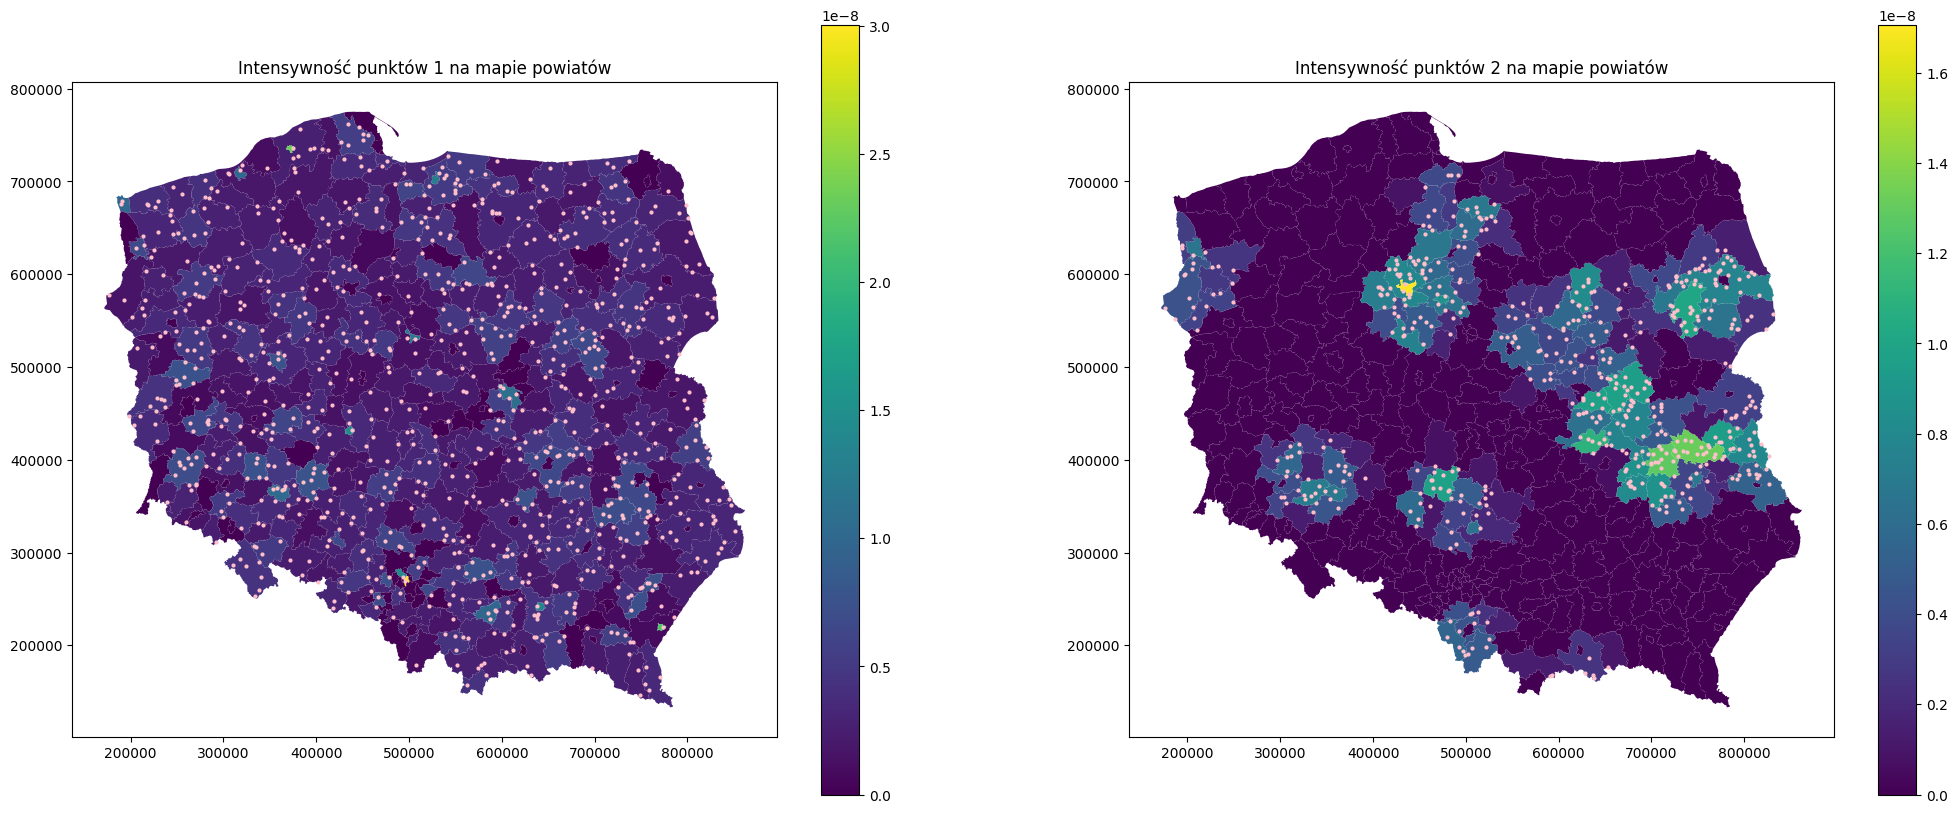

In [8]:
# YOUR CODE HERE
f, a = plt.subplots(1, 2, figsize = (25,10))
powiaty.plot(ax = a[0], column = 'Intensywność punktów 1', legend  = True)
a[0].set_title('Intensywność punktów 1 na mapie powiatów')
punkty1.plot(ax = a[0], color = 'pink', markersize = 4, legend  = True)

powiaty.plot(ax = a[1], column = 'Intensywność punktów 2', legend  = True)
a[1].set_title('Intensywność punktów 2 na mapie powiatów')
punkty2.plot(ax = a[1], color = 'pink', markersize = 4, legend  = True)

#raise NotImplementedError()

### Zadanie 3: Funkcja G (15 pkt)
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [11]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    # YOUR CODE HERE
    tabelka = pd.DataFrame()
    tabelka['Wsp X'] = points['geometry'].x
    tabelka['Wsp Y'] = points['geometry'].y
    
    x = pp.distance_statistics.g(tabelka, 100)
    
    g = pd.DataFrame()
    g['D'] = x[0]
    g['G'] = x[1]
    
    return g
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [14]:
# YOUR CODE HERE

punkty3_g = g_function(punkty3, 1)
punkty4_g = g_function(punkty4, 1)
punkty5_g = g_function(punkty5, 1)

pow_polski = polska.area
ilosc_punktow3 = len(punkty3)
ilosc_punktow4 = len(punkty4)
ilosc_punktow5 = len(punkty5)
int3 = ilosc_punktow3/pow_polski
int4 = ilosc_punktow4/pow_polski
int5 = ilosc_punktow5/pow_polski

punkty3_g_poisson = g_function_poisson(punkty3_g['D'], int3)
punkty4_g_poisson = g_function_poisson(punkty4_g['D'], int4)
punkty5_g_poisson = g_function_poisson(punkty5_g['D'], int5)

#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Rozkład punktów 5 na mapie Polski')

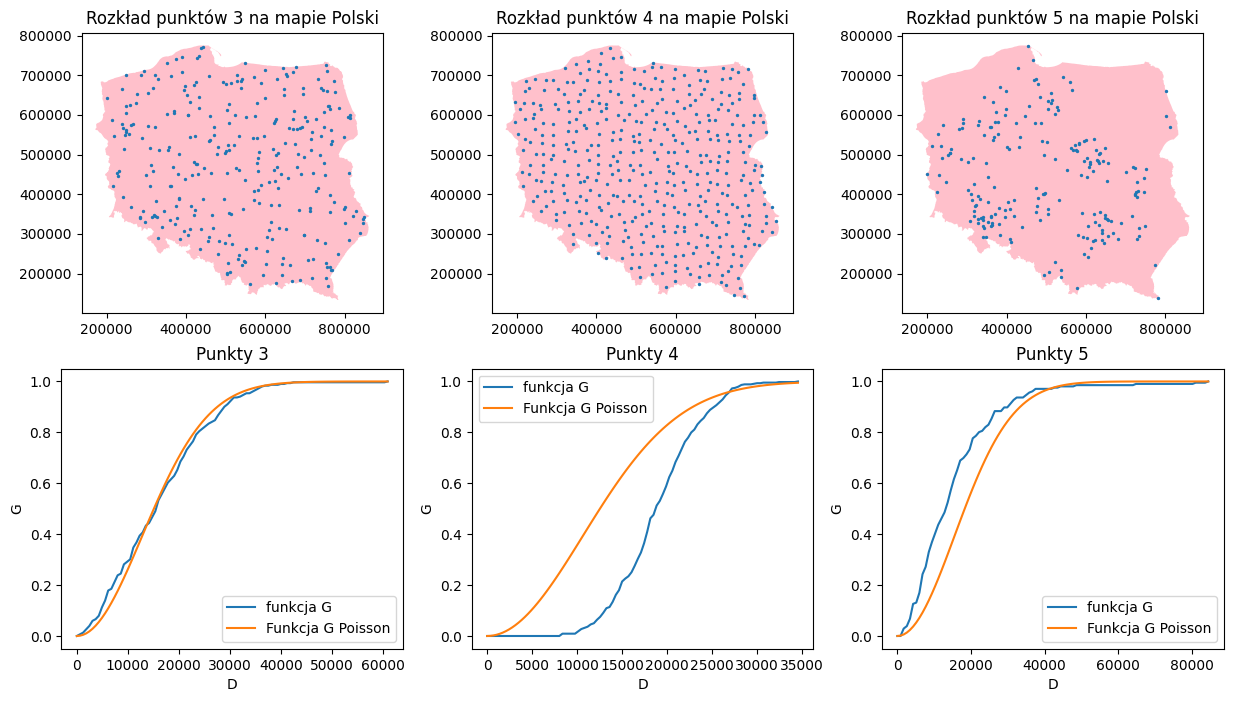

In [15]:
# YOUR CODE HERE
f, a = plt.subplots(2, 3, figsize = (15,8))

sns.lineplot(data = punkty3_g, x = 'D', y = 'G', ax = a[1,0], legend = True, label = 'funkcja G')
a[1, 0].set_title('Punkty 3')

sns.lineplot(data = punkty4_g, x = 'D', y = 'G', ax = a[1,1], legend = True, label = 'funkcja G')
a[1, 1].set_title('Punkty 4')

sns.lineplot(data = punkty5_g, x = 'D', y = 'G', ax = a[1,2], legend = True, label = 'funkcja G')
a[1, 2].set_title('Punkty 5')

sns.lineplot(data = punkty3_g_poisson, x = 'D', y = 'G', ax = a[1,0], legend = True, label = 'Funkcja G Poisson')
sns.lineplot(data = punkty4_g_poisson, x = 'D', y = 'G', ax = a[1,1], legend = True, label = 'Funkcja G Poisson')
sns.lineplot(data = punkty5_g_poisson, x = 'D', y = 'G', ax = a[1,2], legend = True, label = 'Funkcja G Poisson')

polska.plot(ax = a[0,0], color = 'pink')
punkty3.plot(ax = a[0,0], markersize = 2)
a[0,0].set_title('Rozkład punktów 3 na mapie Polski')

polska.plot(ax = a[0,1], color = 'pink')
punkty4.plot(ax = a[0,1], markersize = 2)
a[0,1].set_title('Rozkład punktów 4 na mapie Polski')

polska.plot(ax = a[0,2], color = 'pink')
punkty5.plot(ax = a[0,2], markersize = 2)
a[0,2].set_title('Rozkład punktów 5 na mapie Polski')

#raise NotImplementedError()

### Zadanie 4: Funkcja F (15 pkt)

Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [16]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    # YOUR CODE HERE
    tabelka = pd.DataFrame()
    tabelka['X'] = points['geometry'].x
    tabelka['Y'] = points['geometry'].y
    
    x = pp.distance_statistics.f(tabelka, support = intervals, hull = polygon)
    f = pd.DataFrame()
    f['D'] = x[0]
    f['F'] = x[1]
    return f
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [17]:
# YOUR CODE HERE
punkty3_f = f_function(punkty3, 100, polska['geometry'][0])
punkty4_f = f_function(punkty4, 100, polska['geometry'][0])
punkty5_f = f_function(punkty5, 100, polska['geometry'][0])

punkty3_f_poisson = f_function_poisson(punkty3_f['D'], int3)
punkty4_f_poisson = f_function_poisson(punkty4_f['D'], int4)
punkty5_f_poisson = f_function_poisson(punkty5_f['D'], int5)

#help(pp.distance_statistics.f)
#f_function_poisson(punkty3, 5)
#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Rozkład punktów 5 na mapie Polski')

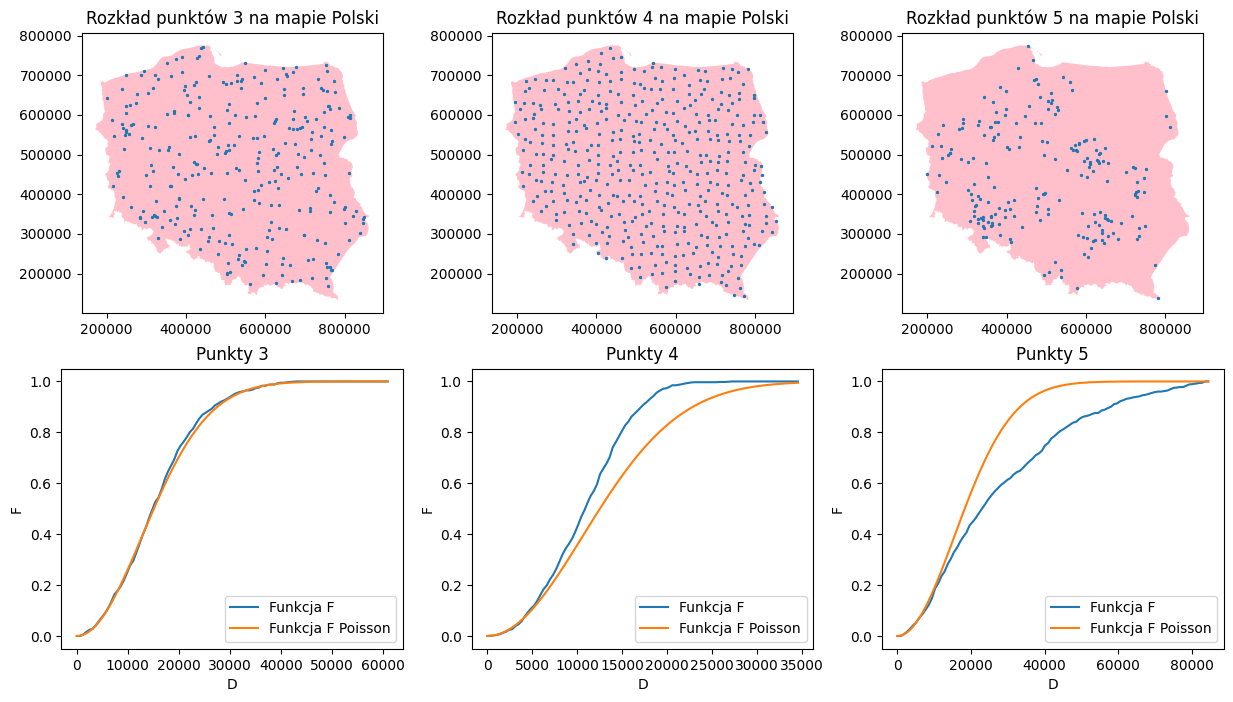

In [18]:
# YOUR CODE HERE
f, a = plt.subplots(2,3, figsize = [15,8])

sns.lineplot(data = punkty3_f, ax = a[1,0], x = 'D', y = 'F', legend = True, label = 'Funkcja F')
a[1,0].set_title('Punkty 3')

sns.lineplot(data = punkty4_f, ax = a[1,1], x = 'D', y = 'F', legend = True, label = 'Funkcja F')
a[1,1].set_title('Punkty 4')

sns.lineplot(data = punkty5_f, ax = a[1,2], x = 'D', y = 'F', legend = True, label = 'Funkcja F')
a[1,2].set_title('Punkty 5')

sns.lineplot(data = punkty3_f_poisson, ax = a[1,0], x = 'D', y = 'F', legend = True, label = 'Funkcja F Poisson')
sns.lineplot(data = punkty4_f_poisson, ax = a[1,1], x = 'D', y = 'F', legend = True, label = 'Funkcja F Poisson')
sns.lineplot(data = punkty5_f_poisson, ax = a[1,2], x = 'D', y = 'F', legend = True, label = 'Funkcja F Poisson')

polska.plot(ax = a[0,0], color = 'pink')
punkty3.plot(ax = a[0,0], markersize = 2)
a[0,0].set_title('Rozkład punktów 3 na mapie Polski')

polska.plot(ax = a[0,1], color = 'pink')
punkty4.plot(ax = a[0,1], markersize = 2)
a[0,1].set_title('Rozkład punktów 4 na mapie Polski')

polska.plot(ax = a[0,2], color = 'pink')
punkty5.plot(ax = a[0,2], markersize = 2)
a[0,2].set_title('Rozkład punktów 5 na mapie Polski')

#raise NotImplementedError()